<a href="https://colab.research.google.com/github/IsakLarsson/Deep-Learning-labs/blob/main/Hyperparameteroptimisering_Isak_%C3%85man_Larsson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Isak Åman Larsson


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


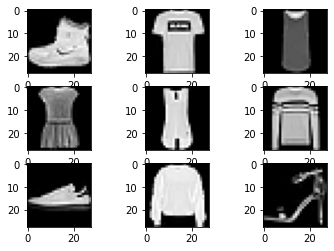

In [ ]:
## Skapad av Isak Åman Larsson isla0031

%tensorflow_version 2.x
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# hämta datat
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# summera det hämtade datat
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# plotta första bilderna för att se hur de ser ut
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [ ]:
#Vi vill spara test setet för endast testning efter modellen är tränad, alltså måste jag dela upp training setet i ett training och validation set
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

## random state =2 ger en random indelning som är likadan för varje körning för att kunna återskapa resultatet
train_images, val_images, train_labels , val_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 2) 

## printa antalet train, val och test bilder samt labels för att se att allt ser bra ut
print('Train set: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Validation set: X=%s, y=%s' % (val_images.shape, val_labels.shape))
print('Test set: X=%s, y=%s' % (test_images.shape, test_labels.shape))

#train_images= train_images/255
#train_images= train_images/255

#print(train_images[10])



Train set: X=(48000, 28, 28), y=(48000,)
Validation set: X=(12000, 28, 28), y=(12000,)
Test set: X=(10000, 28, 28), y=(10000,)


# Bygg modellerna

Tog mitt stora Convnet från förra uppgiften då det fick bäst test score och även hade lite lätt att overtraina, därför borde det finnas en del utrymme för förbättring.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.layers import Dropout, Activation, AveragePooling2D
from tensorflow.keras.optimizers import Adam

img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
batch_size = 32 #32 är default
epochs = 15

models = []  #lista för att spara models i
histories=[] #lista för att spara historiker i


print("training images shape before reshape: ", train_images.shape)
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
val_images = val_images.reshape(val_images.shape[0], img_rows, img_cols, 1)
print("training images shape after reshape: ", train_images.shape)

alexNet = Sequential([
    Conv2D(96, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(784, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
models.append((alexNet,'AlexNet inspired CNN, 5 conv layers'))
alexNet.summary()
alexNet.compile(loss='sparse_categorical_crossentropy', ##viktigt med sparse eftersom att labelsen är integers, "categorical_crossentropy" vill ha sk "one_hot" labels
              optimizer='adam', ##adamax funkar ganska bra också
              metrics=['accuracy'])

alexNet.optimizer.lr = 0.0001 ##Learning rate

alexNetHistory= alexNet.fit(train_images, train_labels,  #sammanställ historiken över träningen
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle='true',
          validation_data=(val_images, val_labels))


histories.append((alexNetHistory, "AlexNet inspired CNN, 5 conv layers","green"))   #lägg till resultatet i en lista för att kunna jämföra alla i slutet

training images shape before reshape:  (48000, 28, 28)
training images shape after reshape:  (48000, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 96)        2496      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 256)       221440    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 384)         393600    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 384)         590208    
________

#Optimiserad modell
batch normalisering och dropout

In [ ]:
from tensorflow.keras.layers import BatchNormalization


optimized = Sequential([
    Conv2D(96, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(784, activation='relu'),
    Dropout(0.25),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
models.append((optimized,'Optimized CNN'))

optimized.compile(loss='sparse_categorical_crossentropy', ##viktigt med sparse eftersom att labelsen är integers, "categorical_crossentropy" vill ha sk "one_hot" labels
              optimizer='adam', ##adamax funkar ganska bra också
              metrics=['accuracy'])

optimized.optimizer.lr = 0.0001 ##Learning rate

optimizedHistory= optimized.fit(train_images, train_labels,  #sammanställ historiken över träningen
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle='true',
          validation_data=(val_images, val_labels),)


histories.append((optimizedHistory, "Optimized CNN","blue"))   #lägg till resultatet i en lista för att kunna jämföra alla i slutet

Epoch 1/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4440 - accuracy: 0.8403 - val_loss: 0.2943 - val_accuracy: 0.8923
Epoch 2/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2721 - accuracy: 0.9002 - val_loss: 0.3195 - val_accuracy: 0.8836
Epoch 3/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2155 - accuracy: 0.9202 - val_loss: 0.2530 - val_accuracy: 0.9072
Epoch 4/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1751 - accuracy: 0.9362 - val_loss: 0.2434 - val_accuracy: 0.9150
Epoch 5/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1367 - accuracy: 0.9492 - val_loss: 0.2732 - val_accuracy: 0.9058
Epoch 6/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1139 - accuracy: 0.9585 - val_loss: 0.2684 - val_accuracy: 0.9146
Epoch 7/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0898 - accuracy: 0.9668 - val_loss: 0.2727 - val_ac

#Printa test loss och test accuracy för alla modeller

In [ ]:
import numpy as np
for model in models:
  print('------',model[1],'------')
  score = model[0].evaluate(test_images, test_labels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print('\n')



------ AlexNet inspired CNN, 5 conv layers ------
Test loss: 0.40676191449165344
Test accuracy: 0.9097999930381775


------ Optimized CNN ------
Test loss: 0.39407381415367126
Test accuracy: 0.9161999821662903




Det verkar som att normaliseringen mha batch normalization och dropout lyckades höja test accuracyn. Däremot verkar test lossen vara väldigt hög och jag misstänker därför en ordentlig överträning fortfarande. Denna modell är nog inte så bra med tanke på hur den övertränar. Skulle kanske använt en annan modell för denna labb, ska justera denna vidare längre ner. Detta är efter 15 epochs, här nedanför kommer det att finnas plottar för att se träningsförloppet. 

#Plot history

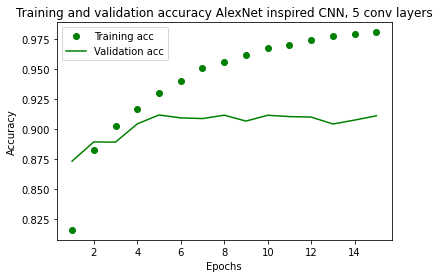

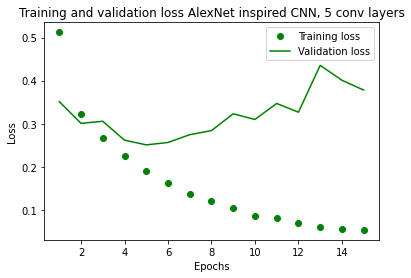

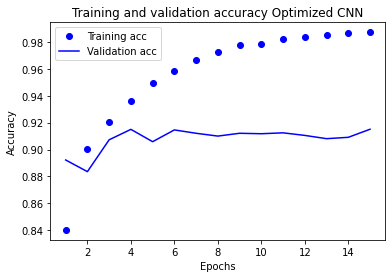

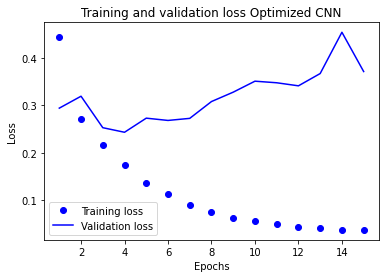

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

for history in histories:

  epochrange = range(1, epochs + 1)
  train_acc = history[0].history['accuracy']
  val_acc = history[0].history['val_accuracy']

  train_loss = history[0].history['loss']
  val_loss = history[0].history['val_loss']

  plt.plot(epochrange, train_acc, 'bo', label='Training acc', color=history[2])
  plt.plot(epochrange, val_acc, 'b', label='Validation acc', color=history[2])
  plt.title('Training and validation accuracy '+ history[1])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(epochrange, train_loss, 'bo', label='Training loss', color=history[2])
  plt.plot(epochrange, val_loss, 'b', label='Validation loss',color= history[2])
  plt.title('Training and validation loss ' + history[1])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()



Här ser vi att validation lossen börjar stiga redan runt 5 epochs, jag kommer att göra en till modell och implementera early stopping på den för att se hur test accuracyn och lossen ser ut då. Samt att undersöka vilken epoch den stannar på

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping


earlystop= EarlyStopping(monitor='val_accuracy', patience=2 , min_delta=0) #definiera early stop

i = 0
class GetEpochs(keras.callbacks.Callback):
  def on_epoch_begin(self, epoch, logs=None):
    global i
    i = i +1
    print(i)

earlystopCNN = Sequential([
    Conv2D(96, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Conv2D(384, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(784, activation='relu'),
    Dropout(0.25),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

earlystopCNN.compile(loss='sparse_categorical_crossentropy', ##viktigt med sparse eftersom att labelsen är integers, "categorical_crossentropy" vill ha sk "one_hot" labels
              optimizer='adam', ##adamax funkar ganska bra också
              metrics=['accuracy'])

earlystopCNN.optimizer.lr = 0.0001 ##Learning rate

earlystopCNNHistory = earlystopCNN.fit(train_images, train_labels,  #sammanställ historiken över träningen
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle='true',
          validation_data=(val_images, val_labels),
          callbacks=[earlystop, GetEpochs()])

print('\n\n')
print('------Early stop CNN------')
score = earlystopCNN.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Number of epochs before stop: ', i)
print('\n')

1
Epoch 1/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4439 - accuracy: 0.8390 - val_loss: 0.3304 - val_accuracy: 0.8758
2
Epoch 2/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2738 - accuracy: 0.9004 - val_loss: 0.2866 - val_accuracy: 0.8948
3
Epoch 3/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2173 - accuracy: 0.9197 - val_loss: 0.2835 - val_accuracy: 0.8946
4
Epoch 4/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1717 - accuracy: 0.9370 - val_loss: 0.2488 - val_accuracy: 0.9124
5
Epoch 5/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1394 - accuracy: 0.9480 - val_loss: 0.2834 - val_accuracy: 0.9072
6
Epoch 6/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1124 - accuracy: 0.9587 - val_loss: 0.3140 - val_accuracy: 0.9078



------Early stop CNN------
Test loss: 0.3288728892803192
Test accuracy: 0.9031999707221985
Number of epochs before 

Här ser vi att den stannar en bra bit innan de 15 epokerna som definierats tidigare, alltså som jag sa så börjar den överträna redan vid ungefär epoch nr 6

#Modifierad version för att minska överträningen

Här implementerar jag en mindre modell där jag skalat bort några lager och neuroner för att se om det kan hjälpa mot överträningen och accuracyn.

In [ ]:
i = 0
modifiedCNN = Sequential([
    Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

modifiedCNN.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modifiedCNN.optimizer.lr = 0.0001 ##Learning rate
modifiedCNN.summary()
modifiedCNNHistory = modifiedCNN.fit(train_images, train_labels,  #sammanställ historiken över träningen
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle='true',
          validation_data=(val_images, val_labels),
          callbacks=[earlystop, GetEpochs()])

print('\n\n')
print('------Modified layers CNN------')
score = modifiedCNN.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Number of epochs before stop: ', i)
print('\n')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_17 (Batc (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3200)             

Här ser vi att accuracyn är bättre och lossen är betydligt lägre än tidigare, alltså bekräftas mina misstankar om att det tidigare nätet är för stort och komplext för denna uppgift. Ett mindre nät fungerar mycket bättre för denna uppgift! Rekorded för denna modell kom upp i 91.7% och 22% test loss.